# Introduction

**Problem Statement**

*   The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products.

*   Breakdown of the Problem Statement:


  1.   Supervised machine learning problem.
  2.   The target value will be Item_Outlet_Sales.

Aim of the NoteBook:

The objective is to create a model that can predict the sales per product for each store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

Variable - Details


*   Item_Identifier- Unique product ID
*   Item_Weight- Weight of product
* Item_Fat_Content - Whether the product is low fat or not

* Item_Visibility - The % of total display area of all 
  products in a store allocated to the particular product

* Item_Type - The category to which the product belongs

* Item_MRP - Maximum Retail Price (list price) of the product

* Outlet_Identifier - Unique store ID

* Outlet_Establishment_Year- The year in which store was established

* Outlet_Size - The size of the store in terms of ground area covered

* Outlet_Location_Type- The type of city in which the store is located

* Outlet_Type- Whether the outlet is just a grocery store or some sort of supermarket

* Item_Outlet_Sales - Sales of the product in the particulat store. This is the outcome variable to be predicted.





# Libraries

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2.Read Data

# File Path

In [124]:
df_train=pd.read_csv('/content/drive/MyDrive/week-1/data sets/Train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/week-1/data sets/Test.csv')
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


3.Data Information (preprocessing of training data)

Now we can see using the .info() method we can see we have filled succesfully all mising the missing data for both sets:

# Data Analysis & Preprocessing

In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Data Describe

In [126]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


Item_Weight is numerical column so we fill it with Mean Imputation

In [127]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [128]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [129]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [130]:
df_train['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [131]:
df_train['Outlet_Size'].value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [132]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [133]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [134]:
df_test.isnull().sum()

Unnamed: 0          0.0
tem_Outlet_Sales    0.0
dtype: float64

Data corr-matrix

<ipython-input-169-bb2f2e8d9f05>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=train.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


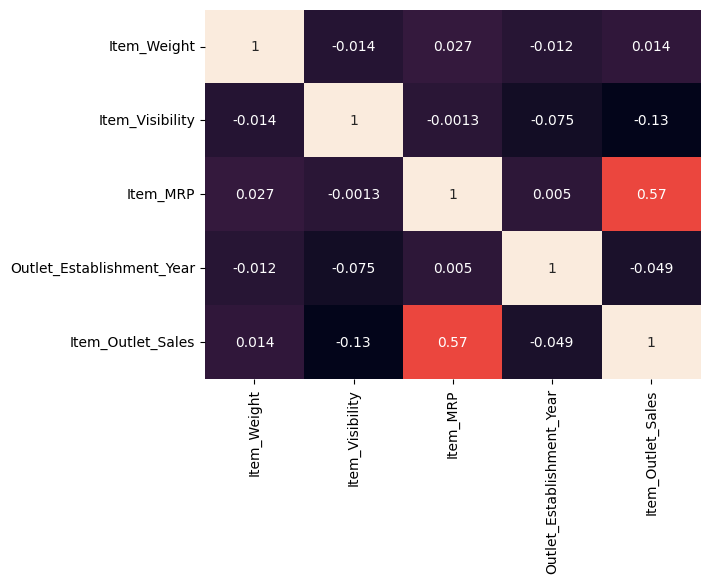

In [169]:
corr=train.corr()
sns.heatmap(corr,annot=True,cbar=False)
corr

# Showing data containing Null data

In [136]:
data_=pd.DataFrame(train.isnull().sum(),columns=['Number Of Null'])
data_['Precision']=data_['Number Of Null']/len(train)*100
data_

,Number Of Null,Precision
Item_Identifier,0,0.000000
Item_Weight,1463,17.165317
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Size,2410,28.276428
Outlet_Location_Type,0,0.000000


# showing Data containing Duplicate data

In [137]:
train[train.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


# Object Columns

In [138]:
object=train.select_dtypes(include='object').columns
object

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

# Data Visualization

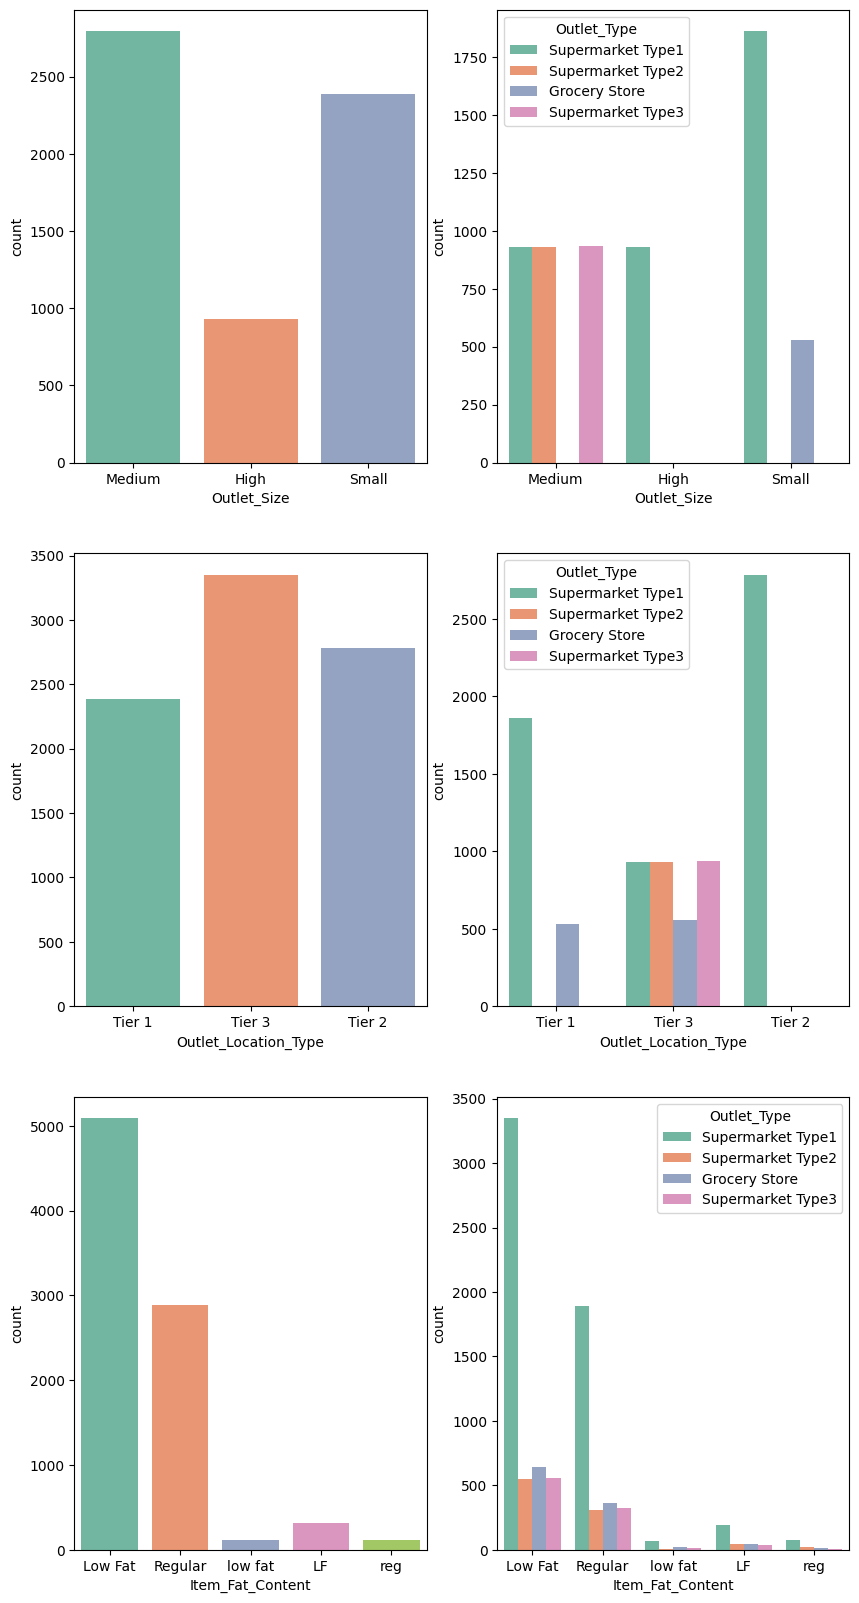

In [139]:
plt.figure(figsize=(10,20))
i=1
for col in ['Outlet_Size', 'Outlet_Location_Type','Item_Fat_Content']:
    plt.subplot(3,2,i)
    sns.countplot(x=col,data=train,palette='Set2')
    i+=1
    plt.subplot(3,2,i)
    sns.countplot(x=col,hue='Outlet_Type',data=train,palette='Set2')
    i+=1

<ipython-input-140-05c845d5eb33>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x='Outlet_Establishment_Year',data=train,palette='Set2')
<ipython-input-140-05c845d5eb33>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x='Item_Outlet_Sales',data=train,palette='Set2')
<ipython-input-140-05c845d5eb33>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x='Item_Weight',data=train,palette='Set2')
<ipython-input-140-05c845d5eb33>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x='Item_Visibility',data=train,palette='Set2')
<ipython-input-140-05c845d5eb33>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x='Item_MRP',data=train,palette='Set2')


<Axes: xlabel='Item_MRP', ylabel='Density'>

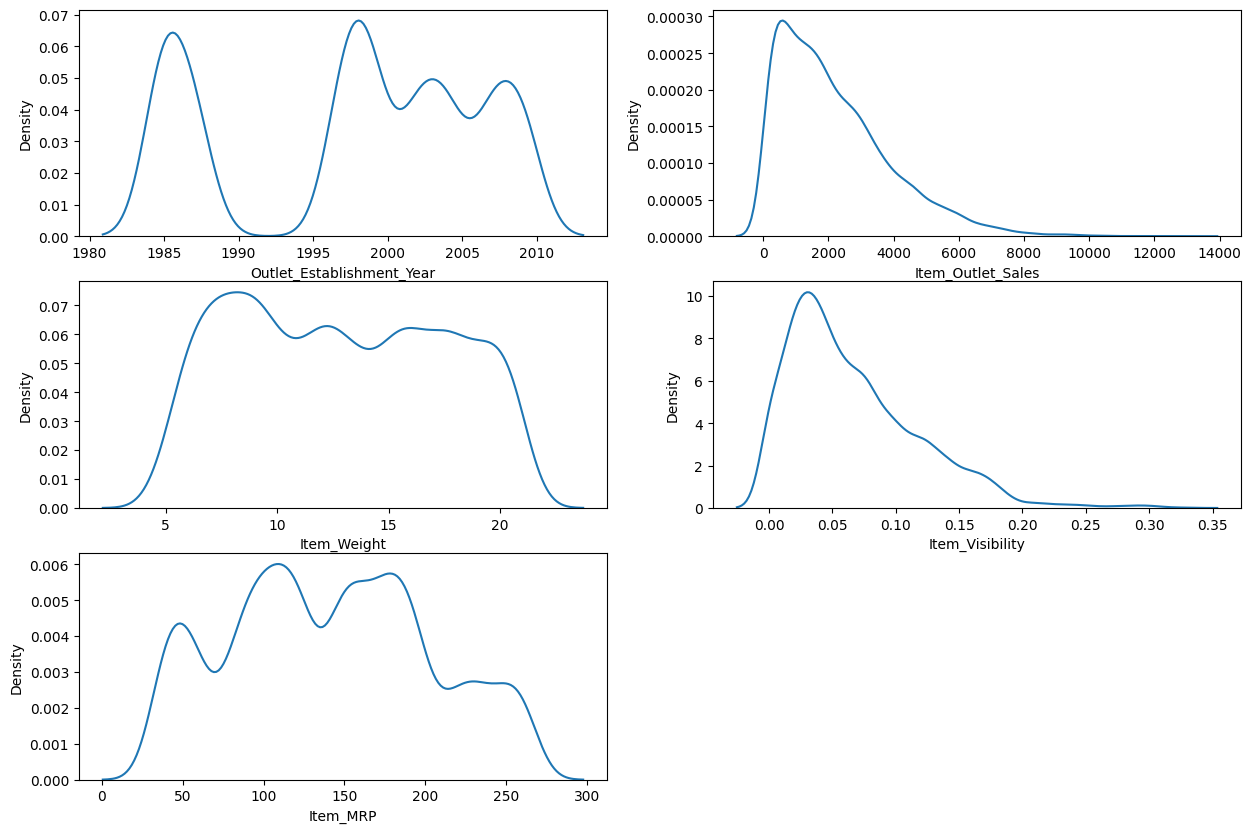

In [140]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.kdeplot(x='Outlet_Establishment_Year',data=train,palette='Set2')
plt.subplot(3,2,2)
sns.kdeplot(x='Item_Outlet_Sales',data=train,palette='Set2')
plt.subplot(3,2,3)
sns.kdeplot(x='Item_Weight',data=train,palette='Set2')
plt.subplot(3,2,4)
sns.kdeplot(x='Item_Visibility',data=train,palette='Set2')
plt.subplot(3,2,5)
sns.kdeplot(x='Item_MRP',data=train,palette='Set2')


count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64


<ipython-input-141-8c93efa5bbce>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Item_Outlet_Sales'], color='g', bins=100, hist_kws={'alpha': 0.4});


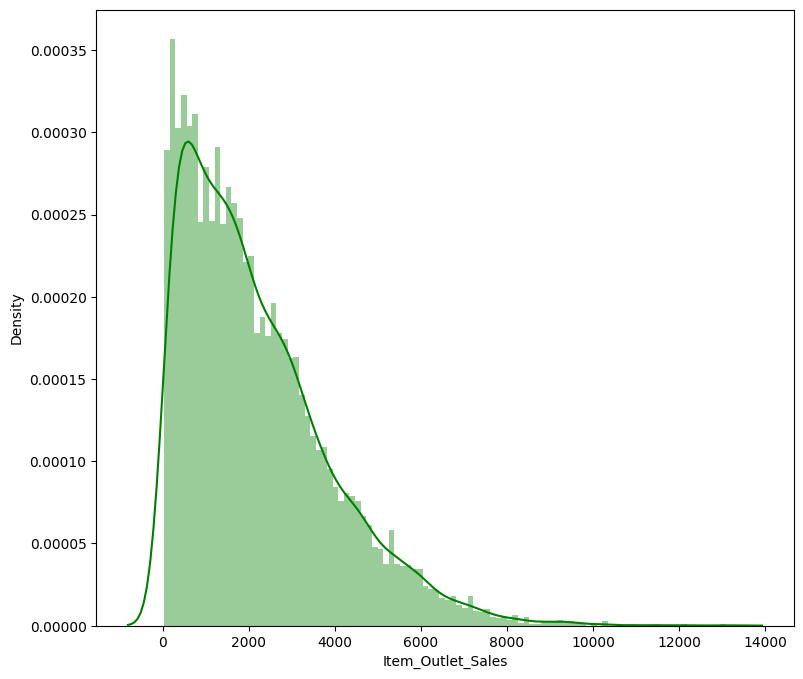

In [141]:
print(df_train['Item_Outlet_Sales'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_train['Item_Outlet_Sales'], color='g', bins=100, hist_kws={'alpha': 0.4});

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

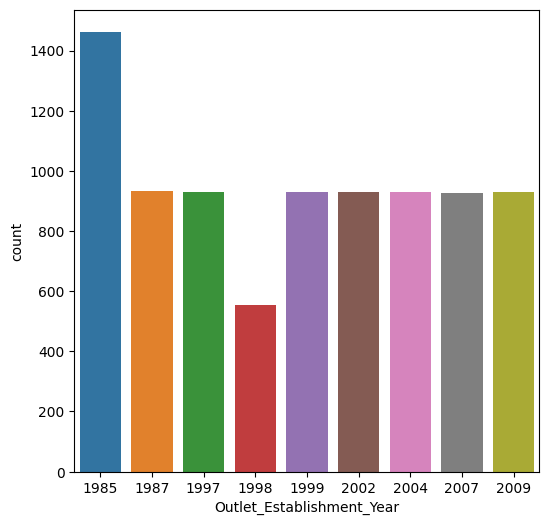

In [142]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=train)

<Axes: xlabel='Item_Type', ylabel='count'>

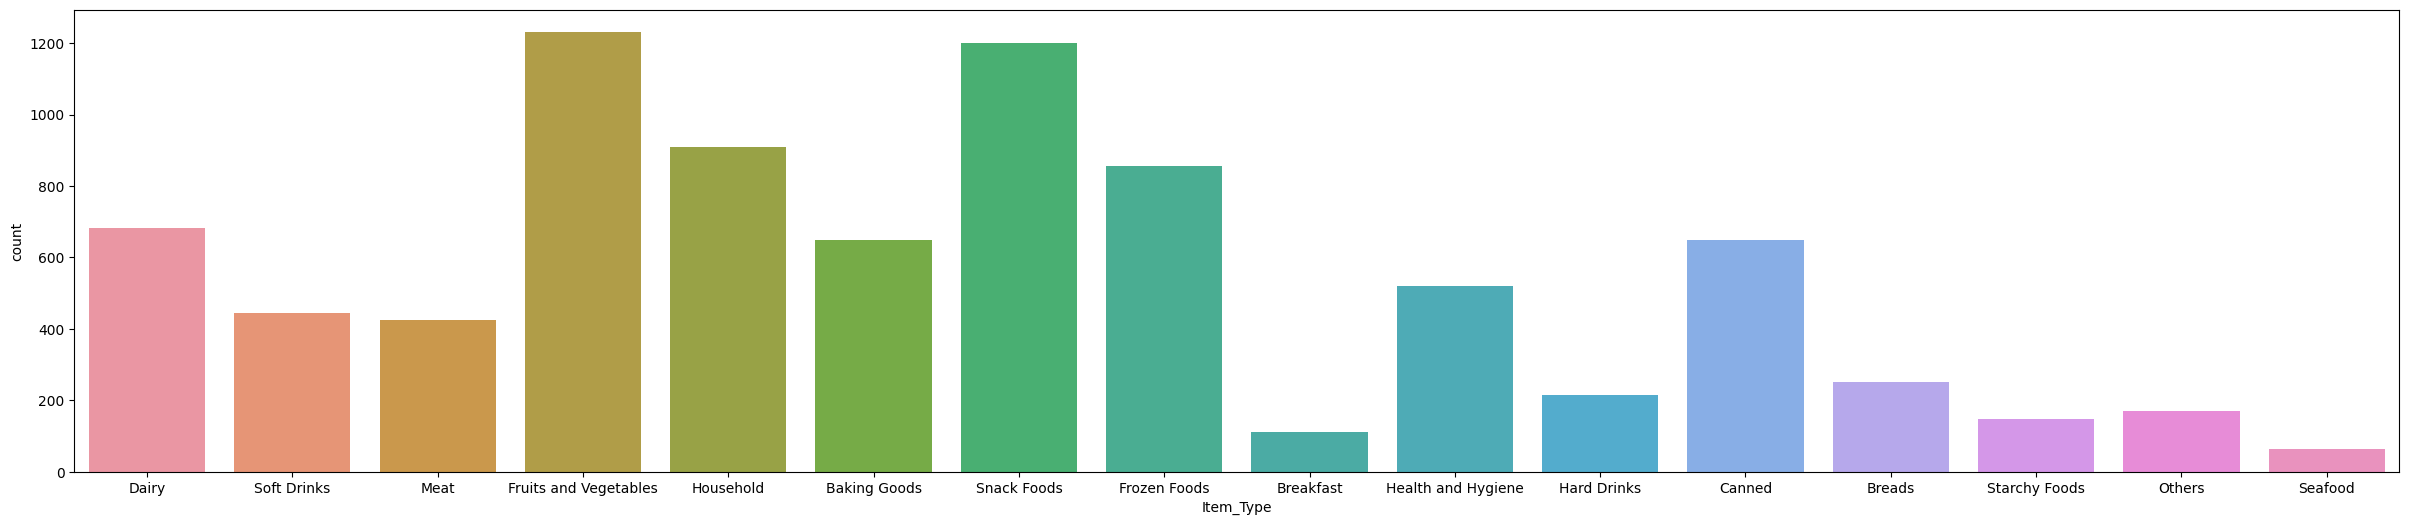

In [143]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=train)

# Input X & Y

In [144]:
X=train.iloc[:,:-1]
y=train.iloc[:,-1]
key=X.keys()
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [145]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

Transform object columns

Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.

After applying Label Encoding with LabelEncoder() our categorical value will replace with the numerical value.

In [146]:
le = LabelEncoder()
for col in object:
    X[col]=le.fit_transform(X[col])
X  

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,2,0.000000,6,182.0950,0,1998,3,2,0
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,2,0.046982,0,108.1570,7,2002,3,1,1
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2


In [147]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# Filling Nan Data

In [148]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X=imp.fit_transform(X)
X=pd.DataFrame(X,columns=key)
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999.0,1.0,0.0,1.0
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009.0,1.0,2.0,2.0
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999.0,1.0,0.0,1.0
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998.0,3.0,2.0,0.0
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987.0,0.0,2.0,1.0
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002.0,3.0,1.0,1.0
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004.0,2.0,1.0,1.0
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009.0,1.0,2.0,2.0


# Splitting Data

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (7244, 11)
X_test shape is  (1279, 11)
y_train shape is  (7244,)
y_test shape is  (1279,)


**Model Building**

# Model Building

In [164]:
X_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
6755,1027.0,17.350,2.0,0.027654,3.0,88.0856,9.0,1999.0,1.0,0.0,1.0
613,1154.0,12.300,2.0,0.000000,13.0,57.3562,1.0,1987.0,0.0,2.0,1.0
8462,798.0,5.785,2.0,0.053802,6.0,85.9856,1.0,1987.0,0.0,2.0,1.0
4496,227.0,13.000,1.0,0.154487,3.0,77.2986,2.0,2007.0,3.0,1.0,1.0
8024,1448.0,17.350,1.0,0.020556,11.0,79.4618,6.0,2004.0,2.0,1.0,1.0


**Applying Random Forest**

Random forest is a Supervised Learning algorithm which uses ensemble learning method for classification and regression. It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [165]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=20, random_state=44)
RandomForestRegressorModel.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, random_state=44)

In [166]:
print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))

Random Forest Regressor Train Score is :  0.9246206248790527
Random Forest Regressor Test Score is :  0.5799013780519262


In [167]:
y_pred = RandomForestRegressorModel.predict(X_test)
print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])


Predicted Value for Random Forest Regressor is :  [1257.73449654  826.59439889 1471.17505624 1852.0598548  1180.29822107
 2219.72343438 2182.87461389 1735.74113435 1425.83255752  188.04670256]


In [168]:
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') 
print('Mean Squared Error Value is : ', MSEValue)
#Calculating Median Absolute Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Absolute Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  759.6547109893745
Mean Squared Error Value is :  1163292.5648895998
Median Absolute Error Value is :  518.3922957664124


In [ ]:
y_test = RandomForestRegressorModel.predict(test)
y_test

In [156]:
y_test=pd.DataFrame(y_test,columns=['tem_Outlet_Sales'])
y_test.to_csv('/content/drive/MyDrive/week-1/data sets/prediction.csv')
y_test

,tem_Outlet_Sales


Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).

Linear regression was the first type of regression analysis to be studied rigorously, and to be used extensively in practical applications. This is because models which depend linearly on their unknown parameters are easier to fit than models which are non-linearly related to their parameters and because the statistical properties of the resulting estimators are easier to determine

In [157]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

In [158]:
def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

# conclusion